In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from algorithms import globals
import os
import numpy as np


In [3]:
def scale(x):
    a, b = globals.def_clamps
    c, d = globals.original_clamps

    x_scaled = ((x - a) / (b - a)) * (d - c) + c
    return x_scaled

def plot_function(curr_f):
    x = np.linspace(globals.def_clamps[0], globals.def_clamps[1], 100)
    y = np.linspace(globals.def_clamps[0], globals.def_clamps[1], 100)
    X, Y = np.meshgrid(x, y)
    objecitve_f = curr_f["func"](ndim=2)

    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            x_clamped = scale(X[i, j])
            y_clamped = scale(Y[i, j])
            Z[i, j] = objecitve_f.evaluate([x_clamped, y_clamped])

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

    ax.set_title(f"{curr_f['shortname']}")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('f(X,Y)') 

    plt.show()



In [4]:
logs = [
# ADAM 0 - 9 (test all by 0.01 B1=0.9 B2=0.999)
    { "name" : "adam clamp lr=0.01 B1=0.8 B2=0.99", "path": "./Adam/adam_clamp_lr=0.01_B1=0.8_B2=0.99_logs/adam_clamp_lr=0.01_B1=0.8_B2=0.99_records_", "run_path": "./Adam/adam_clamp_lr=0.01_B1=0.8_B2=0.99_logs/adam_clamp_lr=0.01_B1=0.8_B2=0.99_run_records_"},
    { "name" : "adam clamp lr=0.001 B1=0.8 B2=0.99", "path": "./Adam/adam_clamp_lr=0.001_B1=0.8_B2=0.99_logs/adam_clamp_lr=0.001_B1=0.8_B2=0.99_records_", "run_path": "./Adam/adam_clamp_lr=0.001_B1=0.8_B2=0.99_logs/adam_clamp_lr=0.001_B1=0.8_B2=0.99_run_records_"},
    { "name" : "adam clamp lr=0.001 B1=0.9 B2=0.999", "path": "./Adam/adam_clamp_lr=0.001_B1=0.9_B2=0.999_logs/adam_clamp_lr=0.001_B1=0.9_B2=0.999_records_", "run_path": "./Adam/adam_clamp_lr=0.001_B1=0.9_B2=0.999_logs/adam_clamp_lr=0.001_B1=0.9_B2=0.999_run_records_"},
    { "name" : "adam clamp lr=0.01 B1=0.9 B2=0.999", "path": "./Adam/adam_clamp_lr=0.01_B1=0.9_B2=0.999_logs/adam_clamp_lr=0.01_B1=0.9_B2=0.999_records_", "run_path": "./Adam/adam_clamp_lr=0.01_B1=0.9_B2=0.999_logs/adam_clamp_lr=0.01_B1=0.9_B2=0.999_run_records_"},

    { "name" : "Adam grad div norm lr=0.01 B1=0.9 B2=0.999", "path": "./Adam/adam_norm_graddiv_lr=0.01_B1=0.9_B2=0.999_logs/adam_norm_graddiv_lr=0.01_B1=0.9_B2=0.999_records_", "run_path": "./Adam/adam_norm_graddiv_lr=0.01_B1=0.9_B2=0.999_logs/adam_norm_graddiv_lr=0.01_B1=0.9_B2=0.999_run_records_"},
   
    { "name" : "Adam lr=0.01 B1=0.9 B2=0.999", "path": "./Adam/adam_logs_lr=0.01/adam_records_", "run_path": "./Adam/adam_logs_lr=0.01/adam_run_records_"},
    
    { "name" : "Adam norm lr=0.01 B1=0.9 B2=0.999", "path": "./Adam/adam_logs_norm_lr=0.01/adam_records_", "run_path": "./Adam/adam_logs_norm_lr=0.01/adam_run_records_"},
    { "name" : "Adam norm lr=0.001 B1=0.8 B2=0.99", "path": "./Adam/adam_logs_norm_lr=0.001_B1=0.8_B2=0.99/adam_records_", "run_path": "./Adam/adam_logs_norm_lr=0.001_B1=0.8_B2=0.99/adam_run_records_"},
    { "name" : "Adam norm lr=0.01 B1=0.8 B2=0.99", "path": "./Adam/adam_logs_norm_lr=0.01_B1=0.8_B2=0.99/adam_records_", "run_path": "./Adam/adam_logs_norm_lr=0.01_B1=0.8_B2=0.99/adam_run_records_"},
    { "name" : "Adam norm lr=0.001 B1=0.9 B2=0.999", "path": "./Adam/adam_logs_norm_lr=0.001/adam_records_", "run_path": "./Adam/adam_logs_norm_lr=0.001/adam_run_records_"},
# CMAES 10 - 12
    { "name" : "CMAES", "path": "./CMAES/cmaes_logs/cmaes_records_", "run_path": "./CMAES/cmaes_logs/cmaes_run_records_"},
    
    { "name" : "cmaes clamp", "path": "./CMAES/cmaes_clamp_logs/cmaes_clamp_records_", "run_path": "./CMAES/cmaes_clamp_logs/cmaes_clamp_run_records_"},
    { "name" : "cmaes clamp lambd=4m", "path": "./CMAES/cmaes_clamp_lambd=4m_logs/cmaes_clamp_lambd=4m_records_", "run_path": "./CMAES/cmaes_clamp_lambd=4m_logs/cmaes_clamp_lambd=4m_run_records_"},   
   

# ADAGRAD 13 - 19
    { "name" : "adagrad lr=0.01", "path": "./Adagrad/adagrad_lr=0.01_logs/adagrad_records_", "run_path": "./Adagrad/adagrad_lr=0.01_logs/adagrad_run_records_"},

    { "name" : "adagrad clamp lr=0.1", "path": "./Adagrad/adagrad_clamp_lr=0.1_logs/adagrad_clamp_lr=0.1_records_", "run_path": "./Adagrad/adagrad_clamp_lr=0.1_logs/adagrad_clamp_lr=0.1_run_records_"},
    { "name" : "adagrad clamp lr=0.01", "path": "./Adagrad/adagrad_clamp_lr=0.01_logs/adagrad_clamp_lr=0.01_records_", "run_path": "./Adagrad/adagrad_clamp_lr=0.01_logs/adagrad_clamp_lr=0.01_run_records_"},
    { "name" : "adagrad clamp lr=0.001", "path": "./Adagrad/adagrad_clamp_lr=0.001_logs/adagrad_clamp_lr=0.001_records_", "run_path": "./Adagrad/adagrad_clamp_lr=0.001_logs/adagrad_clamp_lr=0.001_run_records_"},
    { "name" : "adagrad clamp lr=0.1 rho=0.1 logs", "path": "./Adagrad/adagrad_clamp_lr=0.1_rho=0.1_logs/adagrad_clamp_lr=0.1_rho=0.1_records_", "run_path": "./Adagrad/adagrad_clamp_lr=0.1_rho=0.1_logs/adagrad_clamp_lr=0.1_rho=0.1_run_records_"},
    { "name" : "adagrad clamp lr=1.0 rho=0.1 logs", "path": "./Adagrad/adagrad_clamp_lr=1.0_rho=0.1_logs/adagrad_clamp_lr=1.0_rho=0.1_records_", "run_path": "./Adagrad/adagrad_clamp_lr=1.0_rho=0.1_logs/adagrad_clamp_lr=1.0_rho=0.1_run_records_"},
    { "name" : "adagrad clamp lr=1.0 logs", "path": "./Adagrad/adagrad_clamp_lr=1.0_logs/adagrad_clamp_lr=1.0_records_", "run_path": "./Adagrad/adagrad_clamp_lr=1.0_logs/adagrad_clamp_lr=1.0_run_records_"},

#BFGS 20
    { "name" : "BFGS clamp def", "path": "./BFGS/BFGS_clamp_def_logs/BFGS_clamp_def_records_", "run_path": "./BFGS/BFGS_clamp_def_logs/BFGS_clamp_def_run_records_"},

]

In [5]:
def get_records(path):

    if not os.path.exists(path):
        records = None
    else:
        records = []
        with open(path, mode='r', newline='') as file:
            reader = csv.DictReader(file)
            for row in reader:
                converted_row = {
                    key: (float(value.strip('[]')) if key != 'function' else value)
                    for key, value in row.items()
                }
                records.append(converted_row)

    return records


In [6]:
import numpy as np
import matplotlib.pyplot as plt

num_of_thresholds = 10000

def calculate_thresholds(algs_run_records):
    all_errors = []

    for algorithm, records in algs_run_records.items():
        for r in records:
            error = r['error']
            if isinstance(error, str):
                error = float(error.strip('[]'))
            all_errors.append(error)

    min_error = np.min(all_errors)
    max_error = np.max(all_errors)

    min_error = max(min_error, globals.def_smallest_val)

    thresholds = np.logspace(np.log10(min_error), np.log10(max_error), num=num_of_thresholds)

    return thresholds

def ecdf(run_records, thresholds, dim):
    checkpoint_run_errors = {}

    for r in run_records:
        if r['dimension'] != dim:
            continue
        chk = r['checkpoint']
        error = r['error']
        if isinstance(error, str):
            error = float(error.strip('[]'))
            
        if chk not in checkpoint_run_errors:
            checkpoint_run_errors[chk] = []
        checkpoint_run_errors[chk].append(error)

    avg_part_of_thresholds_reached = []
    prev_reached = None

    for chk in globals.def_checkpoints:
        errors = checkpoint_run_errors.get(chk, [])
        if not errors:
            if prev_reached is None:
                avg_part_of_thresholds_reached.append(0)
            else:
                avg_part_of_thresholds_reached.append(np.mean(prev_reached))
            continue

        fractions = []
        for e in errors:
            reached_now = e <= thresholds

            if prev_reached is not None:
                reached_now = np.logical_or(prev_reached, reached_now)

            fractions.append(np.sum(reached_now) / len(thresholds))

        avg_fraction = np.mean(fractions)
        avg_part_of_thresholds_reached.append(avg_fraction)

        combined_reached = np.zeros(len(thresholds), dtype=bool)
        for e in errors:
            combined_reached = np.logical_or(combined_reached, e <= thresholds)

        if prev_reached is None:
            prev_reached = combined_reached
        else:
            prev_reached = np.logical_or(prev_reached, combined_reached)

    return avg_part_of_thresholds_reached



def compare(logs):
    checkpoints = globals.def_checkpoints

    for curr_f in globals.CEC2013:
        plot_function(curr_f)

        algs_run_records = {}
        algs_records = {}

        for algorithm in logs:
            algs_records[algorithm['name']] = get_records(f"{algorithm['path']}{curr_f['shortname']}.csv")
            algs_run_records[algorithm['name']] = get_records(f"{algorithm['run_path']}{curr_f['shortname']}.csv")

        fig, axs = plt.subplots(2, 3, figsize=(20, 12))
        axs = axs.flatten()
        plot_idx = 0

        # ECDF
        ecdf_thresholds = calculate_thresholds(algs_run_records)

        for dim in globals.def_dimensions:
            ax = axs[plot_idx]
            for algorithm_name, run_record in algs_run_records.items():
                y = ecdf(run_record, ecdf_thresholds, dim)
                ax.plot(globals.def_checkpoints, y, label=algorithm_name, marker='o')

            ax.set_xlabel('Checkpoint (evaluations)')
            ax.set_ylabel('Fraction of thresholds reached (ECDF)')
            ax.set_title(f"{curr_f['shortname']}, ECDF, dim={dim}")
            ax.set_xscale('log')
            ax.set_ylim([0, 1.05])
            ax.grid(True)
            ax.legend()

            plot_idx += 1

        # Mean + Std
        for dim in globals.def_dimensions:
            ax = axs[plot_idx]
            for algorithm_name, records in algs_records.items():
                means = []
                stds = []

                for checkpoint in checkpoints:
                    if records:
                        mean_vals = [r['mean'] for r in records if r['dimensions'] == dim and r['checkpoint'] == checkpoint]
                        std_vals = [r['std'] for r in records if r['dimensions'] == dim and r['checkpoint'] == checkpoint]
                        means.append(np.mean(mean_vals) if mean_vals else 0)
                        stds.append(np.mean(std_vals) if std_vals else 0)
                    else:
                        means.append(0)
                        stds.append(0)

                ax.plot(checkpoints, means, label=algorithm_name, marker='o')
                ax.fill_between(checkpoints,
                                np.array(means) - np.array(stds),
                                np.array(means) + np.array(stds),
                                alpha=0.2)

            ax.set_xlabel('Checkpoint')
            ax.set_ylabel('Error')
            ax.set_title(f"{curr_f['shortname']}, mean and std, dim={dim}")
            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.legend()
            ax.grid(True)

            plot_idx += 1

        plt.tight_layout()
        plt.show()


In [ ]:
to_compare = logs[10:13]

compare(to_compare)

In [ ]:
to_compare = []

indxs = [3, 4, 5, 6, ]
for i in indxs:
    to_compare.append(logs[i])

compare(to_compare)

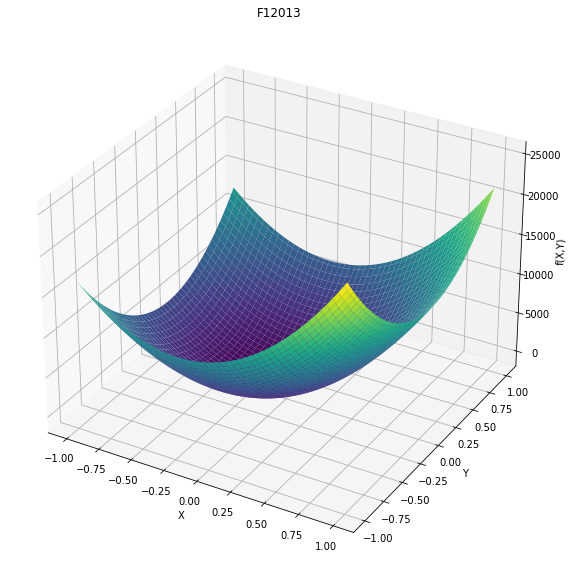

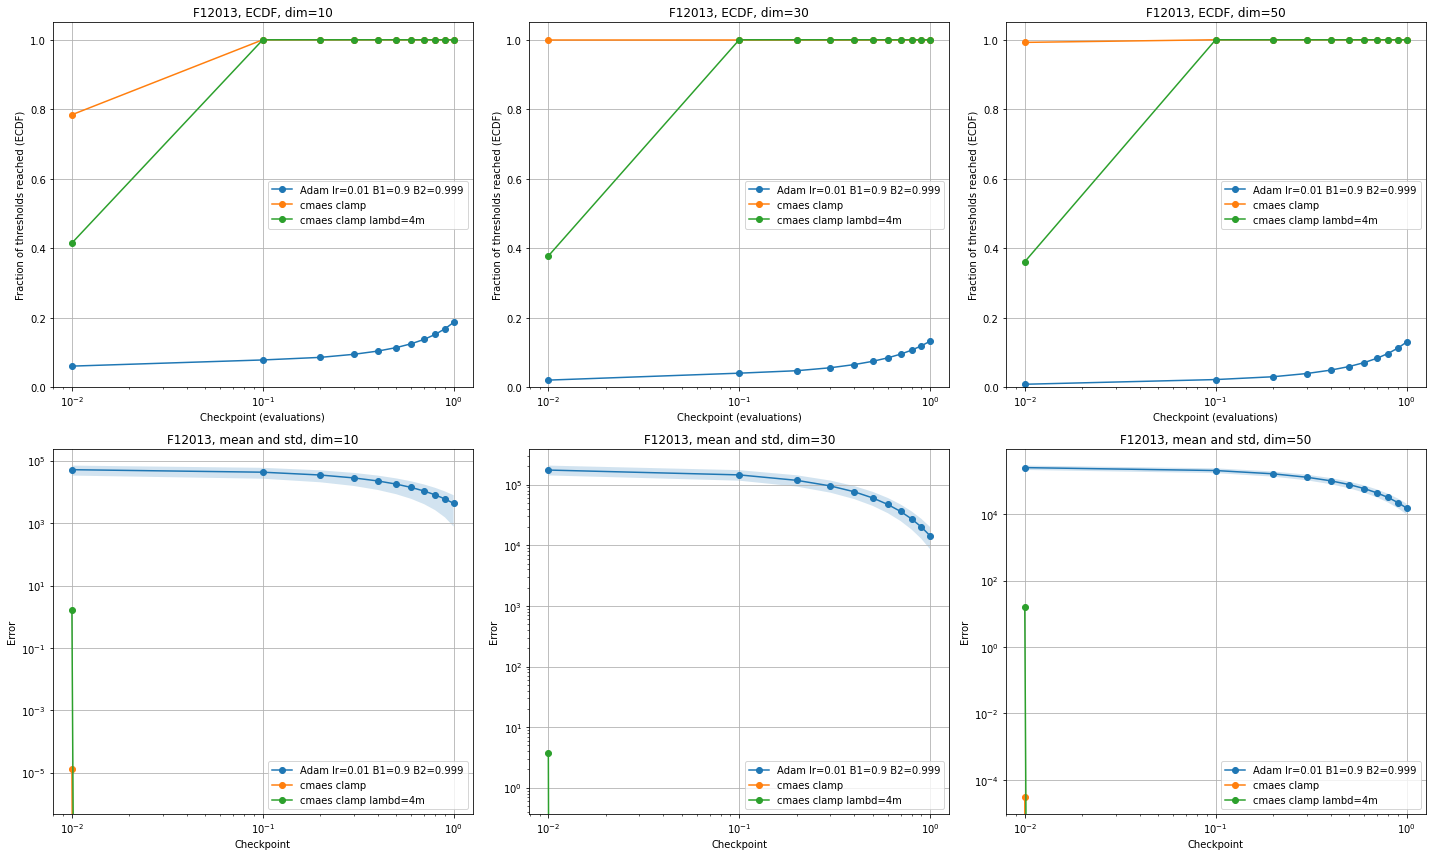

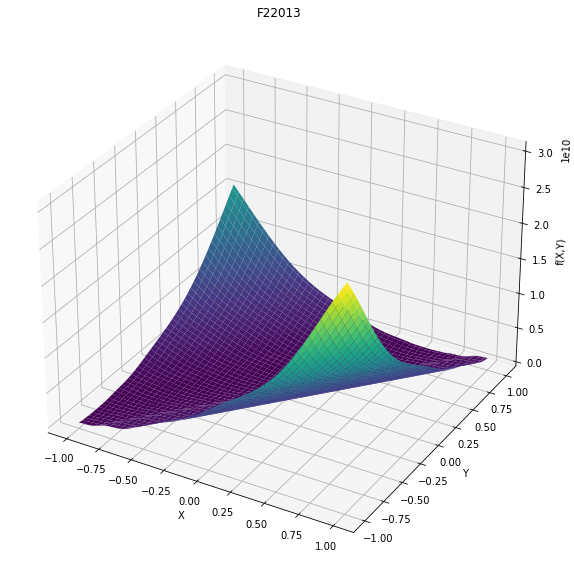

KeyboardInterrupt: 

In [ ]:
to_compare = []

indxs = [4, 19, 12, 20]
for i in indxs:
    to_compare.append(logs[i])

compare(to_compare)

In [ ]:
to_compare = []

indxs = [2, 3, 15]
for i in indxs:
    to_compare.append(logs[i])

compare(to_compare)